## วิเคราะห์สถานการณ์ของเชื้อ COVID-19 ในประเทศไทย

- Name: ทศวรรษ จันทร์ประดับฟ้า
- Student ID: 6142785726

## Github Link
- https://github.com/Tosawadh/th_covid_2021

## References

- [COVID-19 pandemic cases](https://en.wikipedia.org/wiki/COVID-19_pandemic_cases)
- [List of countries and dependencies by population](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population)
- [ผงะ นักวิจัยญี่ปุ่น พบ 'โอมิครอนล่องหน' BA.2 ร้ายกว่าตัวแม่](https://www.thairath.co.th/news/foreign/2319666)
- [โควิดสายพันธุ์ โอไมครอน คืออะไร น่ากลัวแค่ไหน](https://vichaivej-nongkhaem.com/health-info/%E0%B9%82%E0%B8%84%E0%B8%A7%E0%B8%B4%E0%B8%94%E0%B9%82%E0%B8%AD%E0%B9%84%E0%B8%A1%E0%B8%84%E0%B8%A3%E0%B8%AD%E0%B8%99/)
- [COVID-19 Travel Recommendations by Destination](https://www.cdc.gov/coronavirus/2019-ncov/travelers/map-and-travel-notices.html)

---

In [198]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

print(f'pandas version: {pd.__version__}')
print(f'NumPy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
# This code was ran in Python 3.9.7, pandas 1.3.4, NumPy 1.20.3, seaborn 0.11.2 and Matplotlib 3.4.3

pandas version: 1.3.4
NumPy version: 1.20.3
seaborn version: 0.11.2


---

## 2021 monthly cases by country

In [199]:
dfs1=pd.read_html('https://en.wikipedia.org/wiki/COVID-19_pandemic_cases',header=0)
dfs1[4]
# Read table from Wikipedia page: COVID-19 pandemic cases


,Date,First case,Jan 1,Feb 1,Mar 1,Apr 1,May 1,Jun 1,Jul 1,Aug 1,Sep 1,Oct 1,Nov 1,Dec 1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,NaN,81963694.0,102593717.0,113793180.0,128575654.0,150989419.0,170448610.0,181967904.0,197882160.0,217734504.0,233678071.0,246693366.0,262275617.0
2,Days to double,NaN,74.0,80.0,95.0,113.0,126.0,139.0,164.0,185.0,NaN,NaN,NaN,NaN
3,Countries and territories,NaN,222.0,223.0,223.0,223.0,223.0,223.0,223.0,223.0,224.0,225.0,226.0,226.0
4,USA,"January 23, 2020",19346790.0,25817939.0,28244591.0,30095776.0,31948761.0,32938999.0,33333002.0,34766907.0,38936362.0,43092756.0,45665262.0,48162778.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Palau,"August 23, 2021",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,8.0,8.0
226,Vanuatu,"November 11, 2020",1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,5.0
227,Marshall Islands,"October 28, 2020",4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
228,Samoa,"January 20, 2021",0.0,2.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [200]:
df1=dfs1[4]

In [201]:
df1.drop(index=[0,2,3],columns='First case',inplace=True)
df1.rename(columns={"Date":"Country"},inplace=True)
# Dropped unused columns and renamed the "Date" column to "Country"

In [202]:
df1.columns=df1.columns.str.replace(r'\s\d','')
df1.rename(columns={
    "Jan":"January",
    "Feb":"February",
    "Mar":"March",
    "Apr":"April",
    "Jun":"June",
    "Jul":"July",
    "Aug":"August",
    "Sep":"September",
    "Oct":"October",
    "Nov":"November",
    "Dec":"December"},
inplace=True)
# Renamed all months column

C:\Users\tosaw\AppData\Local\Temp/ipykernel_1484/1001108411.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.columns=df1.columns.str.replace(r'\s\d','')


In [203]:
df1=df1.astype({
    "January":'int',
    "February":'int',
    "March":'int',
    "April":'int',
    "May":'int',
    "June":'int',
    "July":'int',
    "August":'int',
    "September":'int',
    "October":'int',
    "November":'int',
    "December":'int'})
df1
# Set all values in all months column to integer

,Country,January,February,March,April,May,June,July,August,September,October,November,December
1,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617
4,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778
5,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776
6,Brazil,7619200,9176975,10517232,12658109,14590678,16515120,18513305,19880273,20752281,21399546,21804094,22084749
7,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Palau,0,0,0,0,0,0,0,0,2,5,8,8
226,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5
227,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4
228,Samoa,0,2,4,4,1,1,1,1,1,1,1,1


---

## Population count by country

In [204]:
dfs2=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population',header=0)
dfs2[0]
# Read table from Wikipedia page: List of countries and dependencies by population

,Rank,Country / Dependency,Region,Population,% of world,Date,Source (official or from the United Nations),Notes
0,–,world,World,7932083000,NaN,23 Feb 2022,UN projection[1],NaN
1,1,China,Asia,1412600000,NaN,31 Dec 2021,National annual estimate[2],The population figure refers to mainland China...
2,2,India,Asia,1388396236,NaN,23 Feb 2022,National population clock[3],The figure includes the population of Jammu an...
3,3,United States,Americas,333276387,NaN,23 Feb 2022,National population clock[4],Includes the 50 states and the District of Col...
4,4,Indonesia[b],Asia,271350000,NaN,31 Dec 2020,National annual estimate[5],NaN
...,...,...,...,...,...,...,...,...
237,–,Niue (New Zealand),Oceania,1549,NaN,1 Jul 2021,National annual projection[92],NaN
238,–,Tokelau (New Zealand),Oceania,1501,NaN,1 Jul 2021,National annual projection[92],NaN
239,195,Vatican City,Europe,825,NaN,1 Feb 2019,Monthly national estimate[196],The total population of 825 consisted of 453 r...
240,–,Cocos (Keeling) Islands (Australia),Oceania,573,NaN,30 Jun 2020,National annual estimate[195],NaN


In [205]:
df2=dfs2[0]

In [206]:
df2.drop(columns=['Rank','Region','% of world','Date','Source (official or from the United Nations)','Notes'],inplace=True)
df2.rename(columns={"Country / Dependency":"Country"},inplace=True)
# Dropped unused columns and simplified the "Country / Dependency" column to "Country"

In [207]:
df2['Country']=df2['Country'].str.replace('[b]','',regex=False)
# Removed the attached reference link

In [208]:
df2.iloc[0,0]='World'
df2.loc[[0]]
# Capitalized the "w" in "world" on index row 0

,Country,Population
0,World,7932083000


In [209]:
df2.iloc[3,0]='USA'
df2.iloc[6,0]='UK'
df2.loc[[3,6]]
# Renamed "United States" to "USA" on index row 3 and "United Kingdom" to "UK" on index row 6

,Country,Population
3,USA,333276387
6,UK,214390509


---

## Analysis

In [210]:
df=pd.merge(df1,df2,on="Country")
df
# Merged both dataframes

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Population
0,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617,7932083000
1,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778,333276387
2,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,1388396236
3,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776,214390509
4,Russia,3186336,3868087,4257650,4554264,4814558,5081417,5538142,6288677,6937333,7535548,8554192,9669718,145478097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Palau,0,0,0,0,0,0,0,0,2,5,8,8,17957
180,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5,301295
181,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,54516
182,Samoa,0,2,4,4,1,1,1,1,1,1,1,1,199853


In [211]:
df.sort_values('December',ascending=False)
# Sort countries from most to least infections

,Country,January,February,March,April,May,June,July,August,September,October,November,December,Population
0,World,81963694,102593717,113793180,128575654,150989419,170448610,181967904,197882160,217734504,233678071,246693366,262275617,7932083000
1,USA,19346790,25817939,28244591,30095776,31948761,32938999,33333002,34766907,38936362,43092756,45665262,48162778,333276387
2,India,10286709,10757610,11112241,12221665,19164969,28175044,30411634,31655824,32810845,33766707,34285814,34596776,1388396236
3,UK,2488784,3817180,4176558,4345792,4416627,4487343,4800911,5856532,6789585,7807040,9057633,10228776,214390509
4,Russia,3186336,3868087,4257650,4554264,4814558,5081417,5538142,6288677,6937333,7535548,8554192,9669718,145478097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Palau,0,0,0,0,0,0,0,0,2,5,8,8,17957
180,Vanuatu,1,1,1,3,3,3,3,3,3,3,5,5,301295
181,Marshall Islands,4,4,4,4,4,4,4,4,4,4,4,4,54516
182,Samoa,0,2,4,4,1,1,1,1,1,1,1,1,199853


In [212]:
infperc=df[['Country','Population']]
# Assign new dataframe for monthly infection rate

In [213]:
print('Table 1: Sort countries by infection rate (December)')
infperc['%Jan']=df['January']/df['Population']*100
infperc['%Feb']=df['February']/df['Population']*100
infperc['%Mar']=df['March']/df['Population']*100
infperc['%Apr']=df['April']/df['Population']*100
infperc['%May']=df['May']/df['Population']*100
infperc['%Jun']=df['June']/df['Population']*100
infperc['%Jul']=df['July']/df['Population']*100
infperc['%Aug']=df['August']/df['Population']*100
infperc['%Sep']=df['September']/df['Population']*100
infperc['%Oct']=df['October']/df['Population']*100
infperc['%Nov']=df['November']/df['Population']*100
infperc['%Dec']=df['December']/df['Population']*100
infperc=infperc[['Country','%Jan','%Feb','%Mar','%Apr','%May','%Jun','%Jul','%Aug','%Sep','%Oct','%Nov','%Dec','Population']]
infperc.sort_values('%Dec',ascending=False)

Table 1: Sort countries by infection rate (December)


C:\Users\tosaw\AppData\Local\Temp/ipykernel_1484/2712578509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infperc['%Jan']=df['January']/df['Population']*100
C:\Users\tosaw\AppData\Local\Temp/ipykernel_1484/2712578509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infperc['%Feb']=df['February']/df['Population']*100
C:\Users\tosaw\AppData\Local\Temp/ipykernel_1484/2712578509.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Sep,%Oct,%Nov,%Dec,Population
100,Montenegro,7.829153,9.994753,12.373130,14.792228,15.673919,16.042819,16.140678,16.430068,18.574744,21.168474,23.233801,25.331318,621306
112,Maldives,3.590640,4.134574,5.166064,6.284730,7.787072,16.807653,19.296332,20.240124,21.219936,22.150417,22.946220,23.947173,383135
139,Seychelles,0.269148,1.210661,2.639060,4.222697,5.647064,11.705409,15.877704,18.509707,20.289914,21.708232,22.470313,23.670894,99202
45,Georgia,6.125936,6.928951,7.265997,7.570188,8.353249,9.258126,9.844463,11.323045,14.850105,16.487890,19.347563,22.799661,3728573
148,Andorra,10.120073,12.493871,13.661910,15.100270,16.636701,17.259068,17.490413,18.454768,18.901113,19.138744,19.508393,21.606840,79535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Marshall Islands,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,0.007337,54516
178,Solomon Islands,0.002335,0.002335,0.002472,0.002610,0.002747,0.002747,0.002747,0.002747,0.002747,0.002747,0.002747,0.002747,728041
180,Vanuatu,0.000332,0.000332,0.000332,0.000996,0.000996,0.000996,0.000996,0.000996,0.000996,0.000996,0.001660,0.001660,301295
183,Tonga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001005,0.001005,99532


Text(0.5, 0, 'Month')

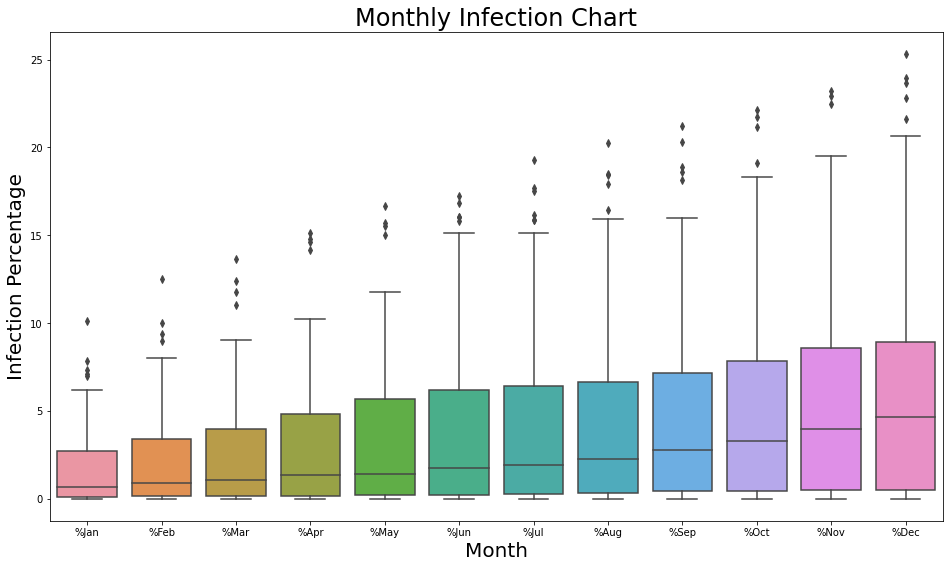

In [214]:
percmonth=['Country','%Jan','%Feb','%Mar','%Apr','%May','%Jun','%Jul','%Aug','%Sep','%Oct','%Nov','%Dec']
plt.figure(figsize=(16,9))
ax1=sns.boxplot(data=infperc[percmonth].loc[1:])
ax1.set_title('Monthly Infection Chart',fontsize=24,fontweight=0)
ax1.set_ylabel('Infection Percentage', fontsize=20, fontweight=0)
ax1.set_xlabel('Month', fontsize=20, fontweight=0)

### จำนวนผู้ป่วยทั่วโลกนั้น มีแนวโน้มที่จะลดลงหรือไม่?
จากแผนภูมิที่ 1 จะสังเกตได้ว่า เปอร์เซ็นต์ผู้ติดเชื้อทั้งหมดได้เริ่มชะลอตัวในเดือนตุลาคม-พฤศจิกายน ซึ่งเป็นสัญญาณที่ดีที่แปลว่า การแพร่ระบาดของไวรัส COVID-19 นั้นกำลังชะลอตัวลง ซึ่งในอีกไม่ช้า เราอาจจะเริ่มเห็นจำนวนผู้ติดเชื้อน้อยลง แต่ทว่า ในช่วง 3 วันที่ผ่านมา ประเทศญี่ปุ่นได้พบว่า ไวรัส COVID-19 สายพันธุ์โอไมครอนนั้น มีความรุนแรงเท่ากับสายพันธุ์เดลต้า ซึ่งก่อนหน้านี้ได้มีการวินิจฉัยมาแล้วว่า COVID-19 สายพันธุ์โอไมครอนนั้น สามารถแพร่กระจายได้อย่างรวดเร็ว ทำให้ผมตั้งสมมุติฐานว่า ในอนาคต ไวรัส COVID-19 ก็อาจจะมีการกลายพันธุ์ได้อีก และส่งผลทำให้ผู้ติดเชื้อสูงขึ้นเช่นกัน

In [215]:
print('Table 2: Showing countries that has higher infection rate than global infection (December 2021)')
infperc[percmonth].loc[infperc['%Dec']>=infperc.iloc[0,11]]

Table 2: Showing countries that has higher infection rate than global infection (December 2021)


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Sep,%Oct,%Nov,%Dec
0,World,1.033319,1.293402,1.434594,1.620957,1.903528,2.148851,2.294075,2.494706,2.744985,2.945986,3.110070,3.306516
1,USA,5.805029,7.746705,8.474825,9.030276,9.586266,9.883388,10.001609,10.431854,11.682904,12.930036,13.701919,14.451302
3,UK,1.160865,1.780480,1.948108,2.027045,2.060085,2.093070,2.239330,2.731712,3.166924,3.641504,4.224829,4.771096
4,Russia,2.190251,2.658879,2.926660,3.130550,3.309473,3.492909,3.806856,4.322766,4.768644,5.179851,5.880055,6.646855
5,Turkey,1.646563,2.925667,3.190339,3.917302,5.692697,6.199087,6.407221,6.763140,7.544060,8.448331,9.486257,10.386821
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Liechtenstein,5.672907,6.556665,6.773773,7.052183,7.718832,7.925723,8.002350,8.147940,8.691987,9.087890,9.425047,12.439018
172,Antigua and Barbuda,0.160061,0.221468,0.730846,1.143582,1.240223,1.268410,1.271430,1.311697,1.726446,3.252565,4.085084,4.168638
173,Monaco,2.281617,3.882660,5.092568,5.966102,6.398957,6.529335,6.719687,7.533246,8.344198,8.638853,8.904824,9.820078
175,Saint Kitts and Nevis,0.059259,0.068519,0.075926,0.081481,0.081481,0.125926,0.820370,1.098148,2.020370,3.607407,4.942593,5.151852


In [216]:
print('Table 3: Comparing Thailand infection rate to global infection rate')
infperc[percmonth].loc[df['Country'].isin(['World','Thailand'])]

Table 3: Comparing Thailand infection rate to global infection rate


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Sep,%Oct,%Nov,%Dec
0,World,1.033319,1.293402,1.434594,1.620957,1.903528,2.148851,2.294075,2.494706,2.744985,2.945986,3.110070,3.306516
23,Thailand,0.010312,0.029387,0.038994,0.043236,0.100430,0.242705,0.396715,0.921725,1.826828,2.419574,2.876397,3.176844


### ประเทศไทย เป็นประเทศเสี่ยงสูงหรือไม่เมื่อเทียบกับประเทศอื่นๆ?
จากตาราง จะสังเกตได้ว่า ค่าเฉลี่ยของเปอร์เซ็นต์ผู้ติดเชื้อของประเทศไทยนั้นเพิ่มขึ้นอย่างต่อเนื่องจนเกือบใกล้เคียงกับเปอร์เว็นต์ผู้ติดเชื้อเฉลี่ยของประชากรทั่วโลกแล้ว ซึ่งถ้าในอุดมการณ์ของผมแล้ว ผมถือว่าตอนนี้ ประเทศไทยนั้นถือว่าเป็นประเทศเสี่ยงสูงในระดับหนึ่งแล้ว หากอ้างอิงจาก CDC แล้ว ประเทศไทยนั้นอยู่ในประเทศที่เสี่ยงระดับ 3 หากรัฐบาลไม่เร่งแก้ไขโดยเร็ว อาจจะทำให้เปอร์เซ็นต์ยอดผู้ติดเชื้อของไทยนั้นสูงกว่าของประชากรทั่วโลกก็ได้และทำให้ประเทศไทยนั้นเป็นประเทศที่เสี่ยงระดับอีก 4 ด้วย



In [217]:
asean=['Thailand','Singapore','Malaysia','Myanmar','Laos','Vietnam','Cambodia','Brunei','Indonesia','Philippines']
print('Table 4: Comparing Thailand infection rate to all ASEAN countries')
infperc[percmonth].loc[df['Country'].isin(asean)].sort_values('%Dec',ascending=False).style.background_gradient(cmap="Reds")

Table 4: Comparing Thailand infection rate to all ASEAN countries


,Country,%Jan,%Feb,%Mar,%Apr,%May,%Jun,%Jul,%Aug,%Sep,%Oct,%Nov,%Dec
20,Malaysia,0.345605,0.657383,0.919753,1.056601,1.249917,1.750370,2.299686,3.404585,5.340357,6.867737,7.558723,8.051518
84,Singapore,1.074501,1.091683,1.099017,1.107177,1.121186,1.137799,1.147481,1.191525,1.239915,1.769858,3.637487,4.854133
150,Brunei,0.035349,0.041861,0.043256,0.049302,0.052326,0.056512,0.060465,0.078372,0.630699,1.654888,3.053495,3.510008
23,Thailand,0.010312,0.029387,0.038994,0.043236,0.100430,0.242705,0.396715,0.921725,1.826828,2.419574,2.876397,3.176844
18,Philippines,0.425048,0.471272,0.516760,0.670003,0.930192,1.103084,1.266492,1.424664,1.784010,2.286271,2.499069,2.539667
13,Indonesia,0.273889,0.397389,0.491850,0.557108,0.614840,0.671348,0.811906,1.267881,1.511015,1.553981,1.564312,1.568707
34,Vietnam,0.001487,0.001847,0.002485,0.002642,0.002972,0.007544,0.017310,0.152330,0.469081,0.802715,0.935054,1.256808
116,Laos,0.000559,0.000600,0.000613,0.000668,0.010316,0.026057,0.028905,0.085843,0.204626,0.324976,0.548817,1.004908
61,Myanmar,0.225391,0.253450,0.256616,0.257589,0.258282,0.259751,0.288176,0.547364,0.728167,0.842612,0.905959,0.945520
108,Cambodia,0.002431,0.002996,0.005273,0.015927,0.086174,0.197464,0.323973,0.496669,0.598339,0.724341,0.762091,0.772456


### ถ้าอยากเดินทางไปต่างประเทศในแถบ ASEAN ประเทศไหนที่น่าไปในช่วงนี้?
หากเทียบจากประเทศไทยแล้ว จะเห็นได้ว่า เปอร์เซ็นต์ผู้ติดเชื้อในประเทศไทยในเดือนธันวาคมนั้น เป็นอันดับ 4 ของ ASEAN ซึ่งหากต้องการเดินทางก็ควรจะหลีกเลี่ยงประเทศที่มีอัตราผู้ติดเชื้อสูงกว่าประเทศไทยทั้ง 3 ประเทศ ได้แก่ มาเลเซีย สิงคโปร์ และ บรูไน เพื่อลดความเสี่ยงที่จะติดเชื้อ COVID-19

### ประเทศไทย มีแนวโน้มที่จะมีผู้ป่วยกลับมาเพิ่มขึ้นหรือไม่?
จากตาราง จะสังเกตได้ว่า จำนวนผู้ติดเชื้อรายเดือนนั้นเริ่มลดลงในช่วงเดือนกันยายน อาจเนื่องไปด้วยมาตรการป้องกันที่ดีในช่วงนั้น ซึ่งอาจเป็นสัญญาณที่ดีที่จะทำให้ผู้ป่วยลดลงอย่างต่อเนื่อง แต่อย่างไรก็ตาม COVID-19 สายพันธุ์โอไมครอน (ซึ่งได้กล่าวมาในหัวข้อแรก) นั้น สามารถแพร่กระจายได้อย่างรวดเร็ว และมีความรุนแรงเท่ากับสายพันธุ์เดลต้า ซึ่งที่กล่าวมานี้ ซึ่งอาจส่งผลให้ประเทศไทยกลับมามีผู้ป่วยเป็นจำนวนมากได้เช่นกัน

---

## Summary

1. อัตราของผู้ติดเชื้อ COVID-19 ทั่วโลกนั้นกำลังชะลอตัว อาจเป็นสัญญาณที่ดีของการลดลงของผู้ติดเชื้อทั้งหมด
2. เนื่องจากการแพร่ระบาดอย่างรวดเร็วในประเทศไทย ทำให้อัตราผู้ติดเชื้อในประเทศเกือบเท่าค่าเฉลี่ยของผู้ติดเชื้อทั้งหมด รัฐบาลควรเร่งแก้ไขปัญหานี้โดยเร็ว
3. ไม่ควรเดินทางประเทศที่มีอัตราผู้ติดเชื้อมากกว่าประเทศไทย เนื่องจากอาจเป็นการเพิ่มความเสี่ยงให้ตนเองติดเชื้อ COVID-19
4. ขณะนี้ ประเทศมีจำนวนผู้ป่วยที่ลดลงอย่างต่อเนื่อง แต่คนไทยควรระมัดระวังไว้เสมอ เพราะเชื้อ COVID-19 อาจกลายพันธุ์และทวีความรุนแรงได้